In [3]:
!pip install tensorflow-gpu

  Using cached tensorflow_gpu-2.10.0-cp38-cp38-win_amd64.whl (455.9 MB)
  Using cached tensorflow_io_gcs_filesystem-0.27.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)
  Using cached protobuf-3.19.6-cp38-cp38-win_amd64.whl (896 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached termcolor-2.1.0-py3-none-any.whl (5.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached Markdown-3.4.1-py3-none-any.wh

# Practical 10

### - Name: Niraj Italiya 
### - Enrollment No: 190130107041
### - Subject: Machine Learning
### - Aim: Digit Classification using MNIST dataset and deep learning

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
mnist = keras.datasets.mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [7]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [1]:
for i in range(5):
  plt.subplot(3,4, i+1)
  plt.imshow(X_train[i], cmap='gray')
plt.show()

NameError: name 'plt' is not defined

## CNN

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics = ['accuracy']

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [13]:
batch_size = 64
epochs = 5

In [14]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)

Epoch 1/5
938/938 - 6s - loss: 0.2900 - accuracy: 0.9179 - 6s/epoch - 6ms/step
Epoch 2/5
938/938 - 3s - loss: 0.1353 - accuracy: 0.9602 - 3s/epoch - 4ms/step
Epoch 3/5
938/938 - 4s - loss: 0.0938 - accuracy: 0.9723 - 4s/epoch - 4ms/step
Epoch 4/5
938/938 - 3s - loss: 0.0715 - accuracy: 0.9789 - 3s/epoch - 4ms/step
Epoch 5/5
938/938 - 3s - loss: 0.0567 - accuracy: 0.9833 - 3s/epoch - 3ms/step


In [15]:
model.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 0s - loss: 0.0728 - accuracy: 0.9757 - 446ms/epoch - 3ms/step


[0.07275399565696716, 0.9757000207901001]

In [16]:
probability_model = keras.models.Sequential([
    model,
    keras.layers.Softmax()
])

In [17]:
predictions = probability_model(X_test)
pred = predictions[0]
print(pred)
label = np.argmax(pred)
print(label)

tf.Tensor(
[1.0086900e-05 1.5415090e-09 6.8819754e-06 3.9309458e-04 3.7533834e-10
 3.9293700e-06 3.6807214e-11 9.9958283e-01 1.8430835e-06 1.3861072e-06], shape=(10,), dtype=float32)
7


In [18]:
predictions = model(X_test)
predictions = tf.nn.softmax(predictions)
print(pred)
label = np.argmax(pred)
print(label)

tf.Tensor(
[1.0086900e-05 1.5415090e-09 6.8819754e-06 3.9309458e-04 3.7533834e-10
 3.9293700e-06 3.6807214e-11 9.9958283e-01 1.8430835e-06 1.3861072e-06], shape=(10,), dtype=float32)
7


In [19]:
pred05 = predictions[0:5]
print(pred05.shape)

(5, 10)


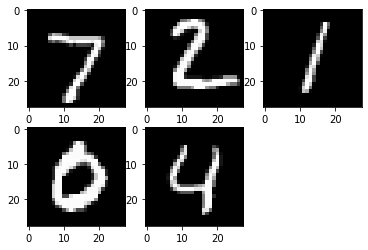

In [20]:
for i in range(5):
  plt.subplot(2, 3, i+1)
  plt.imshow(X_test[i], cmap='gray')
plt.show()

In [21]:
pred05

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.0086900e-05, 1.5415090e-09, 6.8819754e-06, 3.9309458e-04,
        3.7533834e-10, 3.9293700e-06, 3.6807214e-11, 9.9958283e-01,
        1.8430835e-06, 1.3861072e-06],
       [2.0969930e-08, 3.4459381e-06, 9.9999368e-01, 2.7781971e-06,
        2.4798183e-15, 7.3321176e-09, 1.9732997e-09, 6.8979402e-14,
        8.5801510e-08, 5.4589292e-13],
       [6.6605203e-06, 9.9546081e-01, 3.5848413e-04, 8.8215216e-05,
        1.3447495e-04, 3.4363638e-05, 2.1173590e-05, 2.8374095e-03,
        1.0239329e-03, 3.4495635e-05],
       [9.9993265e-01, 6.9218066e-07, 2.9000914e-06, 1.1939900e-06,
        1.2203897e-08, 2.1361634e-06, 6.7655301e-06, 1.1146413e-05,
        1.2340305e-09, 4.2525993e-05],
       [1.9019935e-05, 1.2200203e-06, 1.2715516e-04, 2.5794673e-06,
        9.8607117e-01, 1.4233581e-05, 1.5767735e-05, 5.6459699e-05,
        6.3499592e-06, 1.3686136e-02]], dtype=float32)>

In [22]:
label05 = np.argmax(pred05, axis=1)
print(label05)

[7 2 1 0 4]
